# Linear Classifiers in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
import warnings

jtplot.style(theme='chesterish')
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'
%run Linear_Classifiers_in_Python/plot.py

## Chapter 1. Applying logistic regression and SVM

## 1. Welcome to the course!

### Fitting and predicting

In [2]:
import sklearn.datasets

newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()

X, y = newsgroups.data, newsgroups.target
X.shape

(11314, 130107)

In [3]:
y.shape

(11314,)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

y_pred = knn.predict(X)

### Model evaluation

In [5]:
knn.score(X,y)

0.9999116139296447

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6726758571933545

### №1 KNN classification

* Create a KNN model with default hyperparameters
* Fit the model
* Print out the prediction for the test example 0

```python
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred = knn.predict(X_test)[0]
print('Prediction for test example 0:', pred)
```

### №2 Comparing models

Compare k nearest neighbors classifiers with k=1 and k=5 on the handwritten digits data set, which is already loaded into the variables `X_train`, `y_train`, `X_test`, and `y_test`. You can set k with the `n_neighbors` parameter when creating the `KNeighborsClassifier` object

Which model has a higher test accuracy?

* k=1
* *k=5*

In [7]:
digits = sklearn.datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=1)

knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_1.fit(X_train, y_train)
knn_5.fit(X_train, y_train)

print(knn_1.score(X_test, y_test))
print(knn_5.score(X_test, y_test))

0.9888888888888889
0.9933333333333333


### №3 Overfitting

Which of the following situations looks like an example of overfitting?

* Training accuracy 50%, testing accuracy 50%
* Training accuracy 95%, testing accuracy 95%
* *Training accuracy 95%, testing accuracy 50%*
* Training accuracy 50%, testing accuracy 95%

## 2. Applying logistic regression and SVM

In [8]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()

X, y = newsgroups.data, newsgroups.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Using LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.predict(X_test)

lr.score(X_test, y_test)

0.784022622834924

### LogisticRegression example

In [10]:
import sklearn.datasets
from sklearn.linear_model import LogisticRegression

wine = sklearn.datasets.load_wine()
lr = LogisticRegression()

lr.fit(wine.data, wine.target)
lr.score(wine.data, wine.target)

lr.predict_proba(wine.data[:1])

array([[9.95108705e-01, 4.35738159e-03, 5.33913398e-04]])

### Using LinearSVC

* LinearSVC works the same way:

In [11]:
import sklearn.datasets
from sklearn.svm import LinearSVC

wine = sklearn.datasets.load_wine()
svm = LinearSVC()

svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

0.9269662921348315

### Using SVC

Model complexity review:
* **Underfitting**: model is too simple, low training accuracy
* **Overfitting**: model is too complex, low test accuracy

In [12]:
import sklearn.datasets
from sklearn.svm import SVC

wine = sklearn.datasets.load_wine()
svm = SVC() # default hyperparameters

svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

1.0

### №4 Running LogisticRegression and SVC

* Apply logistic regression and SVM (using `SVC()`) to the handwritten digits data set using the provided train/validation split
* For each classifier, print out the training and validation accuracy


In [13]:
from sklearn import datasets

digits = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

svm = SVC()
svm.fit(X_train, y_train)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9948032665181886
0.9533333333333334
1.0
0.4444444444444444


### №5 Sentiment analysis for movie reviews

* Train a logistic regression model on the movie review data
* Predict the probabilities of negative vs. positive for the two given reviews
* Feel free to write your own reviews and get probabilities for those too!

```python
lr = LogisticRegression()
lr.fit(X, y)

review1 = 'LOVED IT! This movie was amazing. Top 10 this year.'
review1_features = get_features(review1)
print('Review:', review1)
print('Probability of positive review:', lr.predict_proba(review1_features)[0,1])

review2 = 'Total junk! I\'ll never watch a film by that director again, no matter how good the reviews.'
review2_features = get_features(review2)
print('Review:', review2)
print('Probability of positive review:', lr.predict_proba(review2_features)[0,1])
```

## 3. Linear decision boundaries

### Linear decision boundaries

<img src='Linear_Classifiers_in_Python/Pictures/Linear_decision_boundaries.png' alt='Linear decision boundaries' width=700 align='left'>

### Definitions

Vocabulary:
* **classification**: learning to predict categories
* **decision boundary**: the surface separating different predicted classes
* **linear classifier**: a classifier that learns linear decision boundaries e.g., logistic regression, linear SVM
* **linearly separable**: a data set can be perfectly explained by a linearclassifier

### Linearly separable data

<img src='Linear_Classifiers_in_Python/Pictures/Linearly_separable_data.png' alt='Linearly separable data' width=700 align='left'>

### №6 Which decision boundary is linear?

Which of the following is a linear decision boundary?

* *(1)*
* (2)
* (3)
* (4)

<img src='Linear_Classifiers_in_Python/Pictures/multiple_choce_linear_boundary.png' alt='Multiple choce linear boundary' width=600 align='left'>

### №7 Visualizing decision boundaries

* Create the following classifier objects with default hyperparameters: `LogisticRegression`, `LinearSVC`, `SVC`, `KNeighborsClassifier`
* Fit each of the classifiers on the provided data using a `for` loop
* Call the `plot_4_classifers()` function, passing in `X`, `y`, and a list containing the four classifiers

In [14]:
wine = pd.read_csv('Linear_Classifiers_in_Python/wine.csv')

X = wine.iloc[:, :2].values
Y = wine['Target'].values

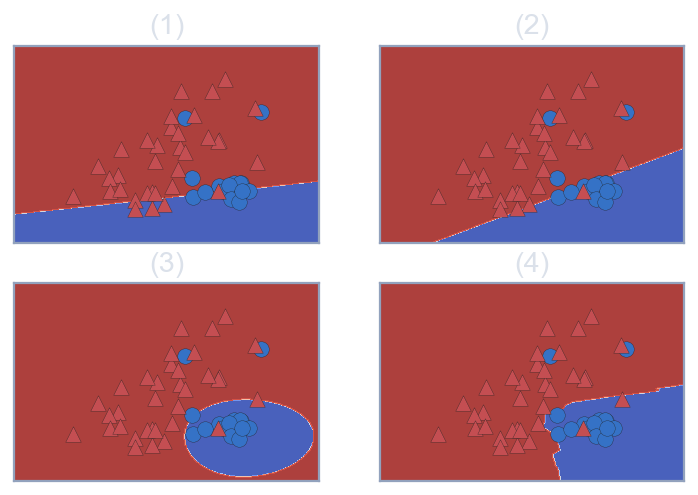

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

for c in classifiers:
    c.fit(X, Y)

plot_4_classifiers(X, Y, classifiers)
plt.show()

## Chapter 2. Loss functions

## 4. Linear classifiers: prediction equations

### Dot products

* x@y is called the dot product of x and y, and is written $x$ ⋅ $y$

In [16]:
x = np.arange(3)
x

array([0, 1, 2])

In [17]:
y = np.arange(3,6)
y

array([3, 4, 5])

In [18]:
x*y

array([ 0,  4, 10])

In [19]:
np.sum(x*y)

14

In [20]:
x@y

14

### Linear classifier prediction

* raw model output = coefficients ⋅ features + intercept
* Linear classifier prediction: compute raw model output, check the  
**sign**
    * if positive, predict one class
    * if negative, predict the other class
* This is the same for logistic regression and linear SVM
    * fit is different but predict is the same

### How LogisticRegression makes predictions

$ \text{raw model output = coefficients ⋅ features + intercept} $

In [21]:
y

array([3, 4, 5])

In [22]:
lr = LogisticRegression()

lr.fit(X,Y)
lr.predict(X)[10]

True

In [23]:
lr.coef_ @ X[10] + lr.intercept_ # raw model output

array([1.35884355])

In [24]:
lr.coef_ @ X[20] + lr.intercept_ # raw model output

array([1.43706029])

### The raw model output

<img src='Linear_Classifiers_in_Python/Pictures/The_raw_model_output.png' alt='The raw model output' width=400 align='left'>

<img src='Linear_Classifiers_in_Python/Pictures/The_raw_model_output2.png' alt='The raw model output' width=400 align='left'>

<img src='Linear_Classifiers_in_Python/Pictures/The_raw_model_output.png' alt='The raw model output' width=400 align='left'>

### №8 How models make predictions

Which classifiers make predictions based on the sign (positive or negative) of the raw model output?

* Logistic regression only
* Linear SVMs only
* Neither
* *Both logistic regression and Linear SVMs*

### №9 Changing the model coefficients

* Set the two coefficients and the intercept to various values and observe the resulting decision boundaries
* Try to build up a sense of how the coefficients relate to the decision boundary
* Set the coefficients and intercept such that the model makes no errors on the given training data

In [25]:
ds = pd.read_csv('Linear_Classifiers_in_Python/ds.csv')

X = ds.iloc[:, :2].values
y = ds['y'].values

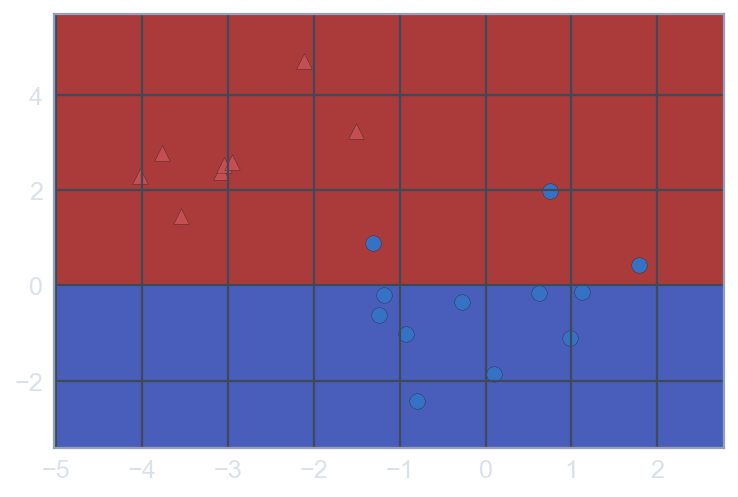

Number of errors: 3


In [26]:
model = LogisticRegression()
model.fit(X, y)

model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

plot_classifier(X,y,model)

num_err = np.sum(y != model.predict(X))
print('Number of errors:', num_err)

## 5. What is a loss function?

### Least squares: the squared loss

* scikit-learn's LinearRegression minimizes a loss:
$$ \sum_{i=1}^{n} \text{(true $i$th target value − predicted $i$th target value)} $$
* Minimization is with respect to coefficients or parameters of the model
* Note that in scikit-learn model.score() isn't necessarily the loss function

### Classification errors: the 0-1 loss

* Squared loss not appropriate for classification problems (more on this later)
* A natural loss for classification problem is the number of errors
* This is the **0-1 loss**: it's 0 for a correct prediction and 1 for an incorrect prediction
* But this loss is hard to minimize!

### Minimizing a loss

In [27]:
from scipy.optimize import minimize

minimize(np.square, 0).x

array([0.])

In [28]:
minimize(np.square, 2).x

array([-1.88846401e-08])

### №10 The 0-1 loss

In the figure below, what is the 0-1 loss (number of classification errors) of the classifier?

* 0
* 1
* *2*
* 3

<img src='Linear_Classifiers_in_Python/Pictures/01_loss_single.png' alt='The 0-1 loss' width=400 align='left'>

### №11 Minimizing a loss function

* Fill in the loss function for least squares linear regression
* Print out the coefficients from fitting sklearn's `LinearRegression`

In [29]:
bhp = sklearn.datasets.load_boston()

X = bhp.data
y = bhp.target

In [30]:
from sklearn.linear_model import LinearRegression

def my_loss(w):
    s = 0
    for i in range(y.size):
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

w_fit = minimize(my_loss, X[0]).x
print(w_fit)

lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28964202e-02  4.87151794e-02 -4.05735725e-03  2.85400577e+00
 -2.86850386e+00  5.92816001e+00 -7.26911753e-03 -9.68512940e-01
  1.71155695e-01 -9.39657198e-03 -3.92188452e-01  1.49054831e-02
 -4.16303722e-01]
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


## 6. Loss function diagrams

### The raw model output

<img src='Linear_Classifiers_in_Python/Pictures/The_raw_model_output4.png' alt='The raw model output3' width=400 align='left'>

### 0-1 loss diagram

<img src='Linear_Classifiers_in_Python/Pictures/The_raw_model_output5.png' alt='0-1 loss diagram' width=400 align='left'>

### Linear regression loss diagram

<img src='Linear_Classifiers_in_Python/Pictures/The_raw_model_output6.png' alt='0-1 loss diagram' width=400 align='left'>

### Logistic loss diagram

<img src='Linear_Classifiers_in_Python/Pictures/The_raw_model_output7.png' alt='0-1 loss diagram' width=400 align='left'>

### Hinge loss diagram

<img src='Linear_Classifiers_in_Python/Pictures/The_raw_model_output8.png' alt='0-1 loss diagram' width=400 align='left'>

<img src='Linear_Classifiers_in_Python/Pictures/The_raw_model_output9.png' alt='0-1 loss diagram' width=400 align='left'>

### №12 Classification loss functions

Which of the four loss functions makes sense for classification?

* (1)
* *(2)*
* (3)
* (4)

<img src='Linear_Classifiers_in_Python/Pictures/multiple_choice_loss_diagram.png' alt='multiple_choice_loss_diagram' width=400 align='left'>

### №13 Comparing the logistic and hinge losses

* Evaluate the `log_loss()` and `hinge_loss()` functions at the grid points so that they are plotted

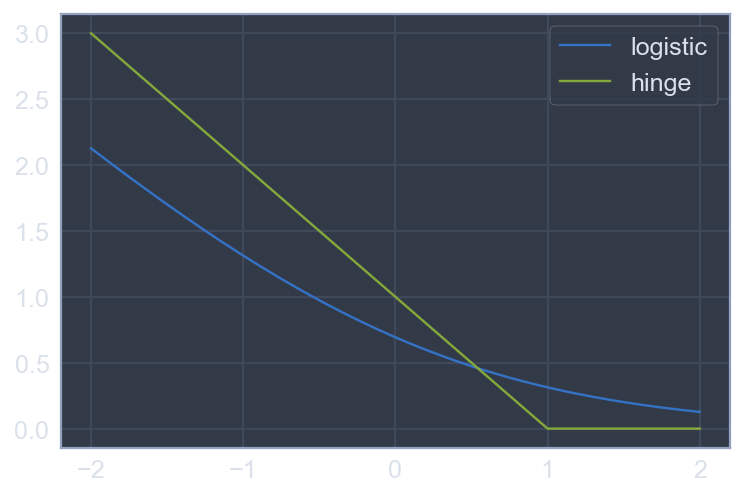

In [31]:
def log_loss(raw_model_output):
    return np.log(1+np.exp(-raw_model_output))

def hinge_loss(raw_model_output):
    return np.maximum(0,1-raw_model_output)

grid = np.linspace(-2,2,1000)

plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

### №14 Implementing logistic regression

* Input the number of training examples into `range()`
* Fill in the loss function for logistic regression
* Compare the coefficients to sklearn's `LogisticRegression`

In [32]:
from sklearn.preprocessing import StandardScaler

bc = sklearn.datasets.load_breast_cancer()

X = bc.data[:, :10]
y = bc.target

scaler = StandardScaler()
X = scaler.fit_transform(X, y)

In [33]:
def my_loss(w):
    s = 0
    for i in range(len(y)):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

w_fit = minimize(my_loss, X[0]).x
print(w_fit)

lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[ 548.25227221  -65.09766617   98.54317381 -872.46846232  -29.56289747
    5.39550298   15.63092636  -99.65836973  -28.0679725    -0.92617834]
[[ 1.03731153 -1.65338651  4.08144225 -9.40788163 -1.06758393  0.07895027
  -0.85072459 -2.44079371 -0.45271642  0.43334169]]


## Chapter 3. Logistic regression

## 7. Logistic regression and regularization

### Regularized logistic regression

<img src='Linear_Classifiers_in_Python/Pictures/Regularized_logistic_regression.png' alt='Regularized logistic regression' width=400 align='left'>

<img src='Linear_Classifiers_in_Python/Pictures/Regularized_logistic_regression2.png' alt='Regularized logistic regression' width=400 align='left'>

### How does regularization affect training accuracy?

* $ \text{regularized loss = original loss + large coefficient penalty} $
* more regularization: lower training accuracy
* more regularization: (almost always) higher test accuracy

In [34]:
lr_weak_reg = LogisticRegression(C=100)
lr_strong_reg = LogisticRegression(C=0.01)

lr_weak_reg.fit(X_train, y_train)
lr_strong_reg.fit(X_train, y_train)

lr_weak_reg.score(X_train, y_train)

0.9992576095025983

In [35]:
lr_strong_reg.score(X_train, y_train)

0.9836674090571641

In [36]:
lr_weak_reg.score(X_test, y_test)

0.9444444444444444

In [37]:
lr_strong_reg.score(X_test, y_test)

0.96

### L1 vs. L2 regularization

* Lasso = linear regression with L1 regularization
* Ridge = linear regression with L2 regularization
* For other models like logistic regression we just say L1, L2, etc

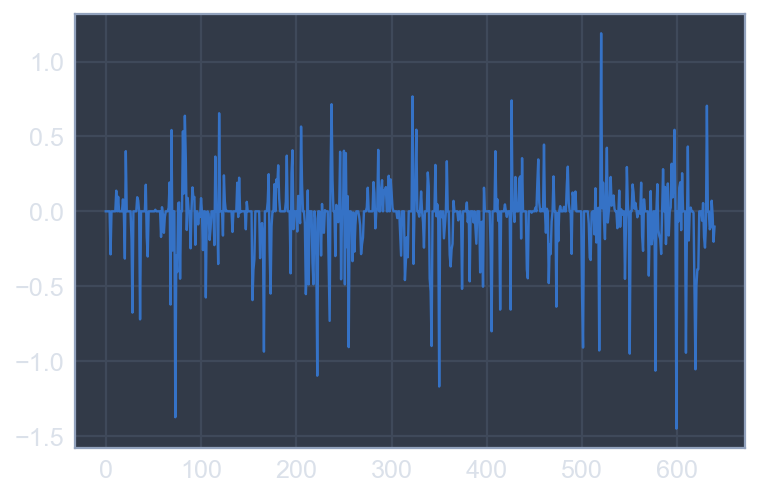

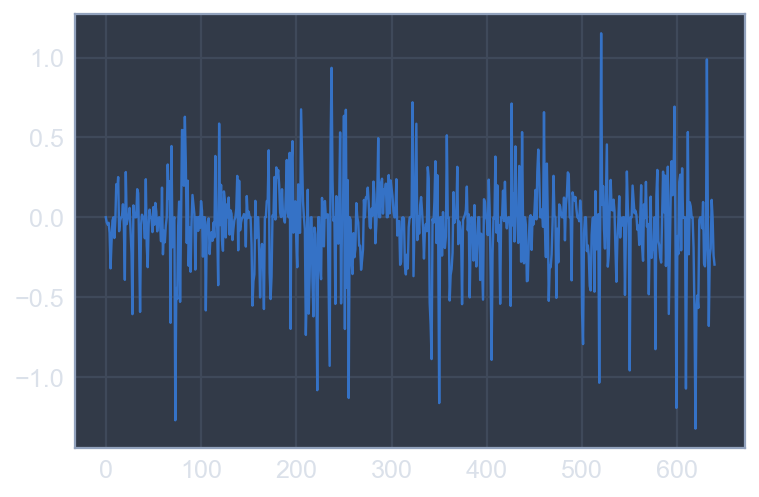

In [38]:
lr_L1 = LogisticRegression(penalty='l1')
lr_L2 = LogisticRegression() # penalty='l2' by default

lr_L1.fit(X_train, y_train)
lr_L2.fit(X_train, y_train)

plt.plot(lr_L1.coef_.flatten())
plt.show()
plt.plot(lr_L2.coef_.flatten())
plt.show()

### №15 Regularized logistic regression

* Loop over the different values of `C_value`, creating and fitting a `LogisticRegression` model each time
* Save the error on the training set and the validation set for each model
* Create a plot of the training and testing error as a function of the regularization parameter, `C`
* Looking at the plot, what's the best value of `C`

In [39]:
digits = datasets.load_digits()

X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

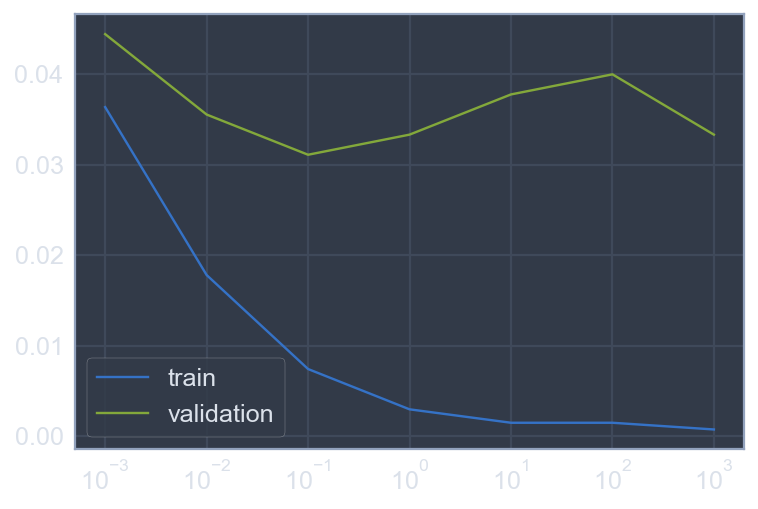

In [40]:
train_errs = list()
valid_errs = list()
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C_value in C_values:
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    train_errs.append(1.0 - lr.score(X_train, y_train) )
    valid_errs.append(1.0 - lr.score(X_valid, y_valid) )
    
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(('train', 'validation'))
plt.show()

### №16 Logistic regression and feature selection

* Instantiate a logistic regression object that uses L1 regularization
* Find the value of `C` that minimizes cross-validation error
* Print out the number of selected features for this value of `C`

In [41]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(penalty='l1')

searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

print('Best CV params', searcher.best_params_)

best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print('Total number of features:', coefs.size)
print('Number of selected features:', np.count_nonzero(coefs))

Best CV params {'C': 0.1}
Total number of features: 640
Number of selected features: 255


### №17 Identifying the most positive and negative words

* Find the words corresponding to the 5 largest coefficients
* Find the words corresponding to the 5 smallest coefficients

```python
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

print('Most positive words: ', end='')
for i in range(5):
    print(vocab[inds_descending[i]], end=', ')
print('\n')

print('Most negative words: ', end='')
for i in range(5):
    print(vocab[inds_ascending[i]], end=', ')
print('\n')
```

## 8. Logistic regression and probabilities

### Logistic regression probabilities

Without regularization (C = 10 ):
* model coefficients: [[1.55 1.57]]
* model intercept: [-0.64]

<img src='Linear_Classifiers_in_Python/Pictures/Logistic_regression_probabilities.png' alt='Logistic regression probabilities' width=250 align='left'>

### Logistic regression probabilities

Without regularization (C = $10^8$ ):
* model coefficients: [[1.55 1.57]]
* model intercept: [-0.64]

<img src='Linear_Classifiers_in_Python/Pictures/Logistic_regression_probabilities2.png' alt='Logistic regression probabilities' width=250 align='left'>

With regularization (C = 1):
* model coefficients: [[0.45 0.64]]
* model intercept: [-0.26]

<img src='Linear_Classifiers_in_Python/Pictures/Logistic_regression_probabilities3.png' alt='Logistic regression probabilities' width=250 align='left'>

### How are these probabilities computed?

* logistic regression predictions: sign of raw model output
* logistic regression probabilities: 'squashed' raw model output

<img src='Linear_Classifiers_in_Python/Pictures/How_are_these_probabilities_computed.png' alt='Logistic regression probabilities' width=400 align='left'>

### №18 Getting class probabilities

Which of the following transformations would make sense for transforming the raw model output of a linear classifier into a class probability?

* (1)
* (2)
* *(3)*
* (4)

<img src='Linear_Classifiers_in_Python/Pictures/multiple_choice_proba_transform.png' alt='Getting class probabilities' width=400 align='left'>

### №19 Regularization and probabilities

1. 
    * Compute the maximum predicted probability
    * Run the provided code and take a look at the plot

In [42]:
X = ds.iloc[:, :2].values
y = ds['y'].values

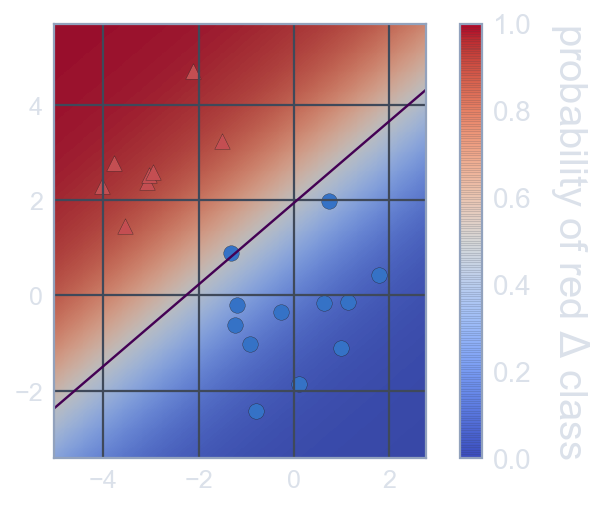

Maximum predicted probability 0.9761229967078282


In [43]:
model = LogisticRegression(C=1)

model.fit(X,y)
plot_classifier(X,y,model,proba=True)

prob = model.predict_proba(X)
print('Maximum predicted probability', np.max(prob))

2. Create a model with `C=0.1` and examine how the plot and probabilities change

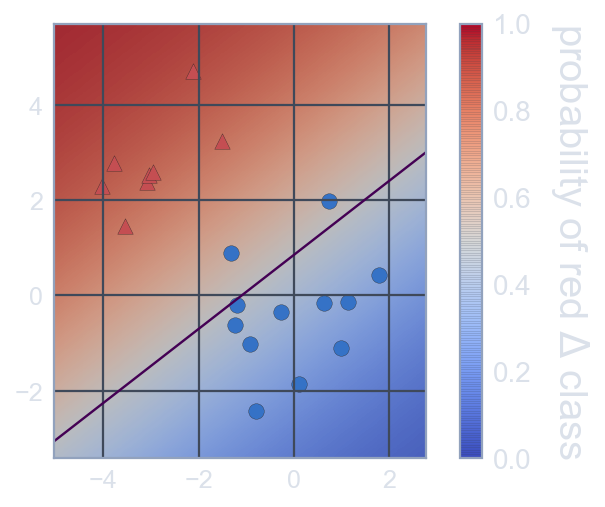

Maximum predicted probability 0.8990965658995651


In [44]:
model = LogisticRegression(C=0.1)

model.fit(X,y)
plot_classifier(X,y,model,proba=True)

prob = model.predict_proba(X)
print('Maximum predicted probability', np.max(prob))

### №20 Visualizing easy and difficult examples

* Fill in the first blank with the index of the digit that the model is most confident about
* Fill in the second blank with the index of the digit that the model is least confident about
* Observe the images: do you agree that the first one is less ambiguous than the second?

```python
lr = LogisticRegression()
lr.fit(X,y)

proba = lr.predict_proba(X)

proba_inds = np.argsort(np.max(proba,axis=1))

show_digit(proba_inds[-1], lr)
show_digit(proba_inds[0], lr)
```

## 9. Multi-class logistic regression

### Combining binary classifiers with one-vs-rest

```python
In [1]: lr0.fit(X, y==0)
In [2]: lr1.fit(X, y==1)
In [3]: lr2.fit(X, y==2)
```

```python
In [4]: lr0.decision_function(X)[0] # get raw model output
Out[4]: 6.124
In [5]: lr1.decision_function(X)[0]
Out[5]: -5.429
In [6]: lr2.decision_function(X)[0]
Out[6]: -7.532
```

```python
In [7]: lr.fit(X, y)
```

```python
In [8]: lr.predict(X)[0]
Out[8]: 0
```

### One-vs-rest vs. multinomial/softmax

One-vs-rest:
* fit a binary classifier for each class
* predict with all, take largest output
* pro: simple, modular
* con: not directly optimizingaccuracy
* common for SVMs as well
* can produce probabilities  

'Multinomial' or 'softmax':
* fit a single classifier for allclasses
* prediction directly outputs bestclass
* con: more complicated, newcode
* pro: tackle the problem directly
* possible for SVMs, but lesscommon

### Model coefficients for multi-class

```python
In [1]: lr_ovr = LogisticRegression() # one-vs-rest by default
In [2]: lr_ovr.fit(X,y)
In [3]: lr_ovr.coef_.shape
Out[3]: (3,13)
In [4]: lr_ovr.intercept_.shape
Out[4]: (3,)
```

```python
In [5]: lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
In [6]: lr_mn.fit(X,y)
In [7]: lr_mn.coef_.shape
Out[7]: (3,13)
In [8]: lr_mn.intercept_.shape
Out[8]: (3,)
```

### №21 Counting the coefficients

If you fit a logistic regression model on a classification problem with 3 classes and 100 features, how many coefficients would you have, including intercepts?

* 101
* 103
* 301
* *303*

### №22 Fitting multi-class logistic regression

* Fit a one-vs-rest logistic regression classifier and report the results
* Fit a softmax logistic regression classifier by setting the `multiclass` paramater, plus setting to be `solver = 'lbfgs'`, and report the results

In [45]:
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=1)

lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print('OVR training accuracy:', lr_ovr.score(X_train, y_train))
print('OVR test accuracy    :', lr_ovr.score(X_test, y_test))

lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

print('Softmax training accuracy:', lr_mn.score(X_train, y_train))
print('Softmax test accuracy    :', lr_mn.score(X_test, y_test))

OVR training accuracy: 0.9948032665181886
OVR test accuracy    : 0.9644444444444444
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9688888888888889


### №23 Visualizing multi-class logistic regression

* Create a new logistic regression object (also with `C=100`) to be used for binary classification
* Visualize this binary classifier with `plot_classifier`... does it look reasonable?

In [46]:
ds2 = pd.read_csv('Linear_Classifiers_in_Python/ds2.csv')

X_train = ds2.iloc[:, :2].values
y_train = ds2['y'].values

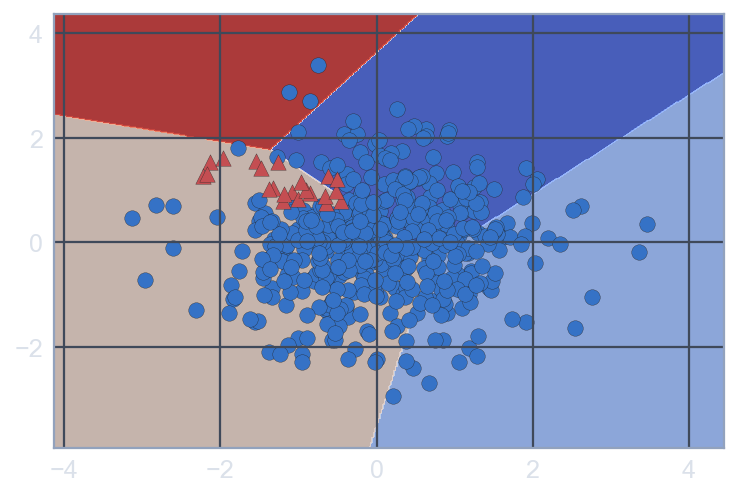

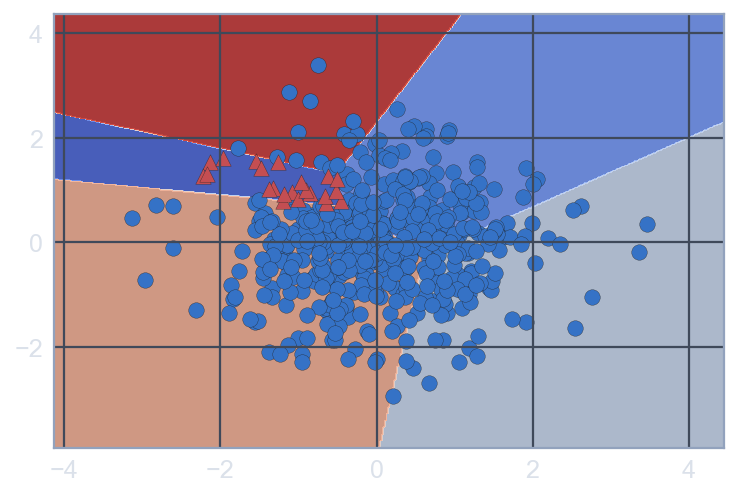

In [47]:
lr_ovr = LogisticRegression(C=100)
lr_ovr.fit(X_train, y_train)
plot_classifier(X_train, y_train==1, lr_ovr)

lr_mn = LogisticRegression(C=100, multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)
plot_classifier(X_train, y_train==1, lr_mn)

Softmax     training accuracy: 0.996
One-vs-rest training accuracy: 0.916


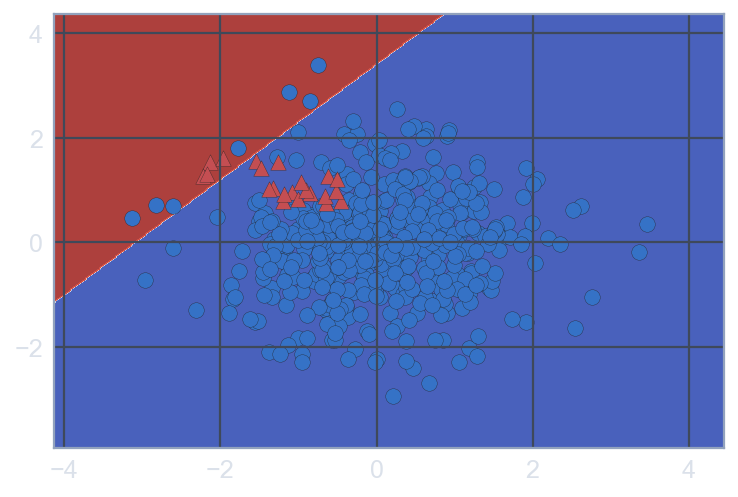

In [48]:
print('Softmax     training accuracy:', lr_mn.score(X_train, y_train))
print('One-vs-rest training accuracy:', lr_ovr.score(X_train, y_train))

lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

plot_classifier(X_train, y_train==1, lr_class_1)

### №24 One-vs-rest SVM

* Fit an `SVC` called `svm_class_1` to predict class 1 vs. other classes
* Plot this classifier

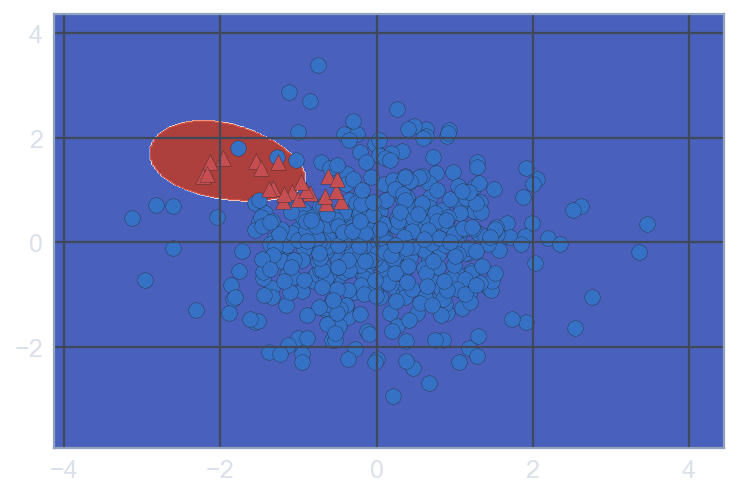

In [49]:
from sklearn.svm import SVC

svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)

## Chapter 4. Support Vector Machines

## 10. Support Vectors

### What is an SVM?

* Linear classifiers (so far)
* Trained using the hinge loss and L2 regularization

<img src='Linear_Classifiers_in_Python/Pictures/The_raw_model_output9.png' alt='0-1 loss diagram' width=300 align='left'>

### What are support vectors?

* Support vector: a training example **not** in the flat part of the loss diagram
* Support vector: an example that is incorrectly classified **or** close to the boundary
* If an example is not a support vector, removing it has no effect on the model
* Having a small number of support vectors makes kernel SVMs really fast

### Max-margin viewpoint

* The SVM maximizes the 'margin' for linearly separable datasets
* Margin: distance from the boundary to the closest points

<img src='Linear_Classifiers_in_Python/Pictures/Max-margin_viewpoint.png' alt='Max-margin viewpoint' width=300 align='left'>

### №25 Support vector definition

Which of the following is a true statement about support vectors? 

* All support vectors are classified correctly
* All support vectors are classified incorrectly
* All correctly classified points are support vectors
* *All incorrectly classified points are support vectors*

<img src='Linear_Classifiers_in_Python/Pictures/Support_vector_definition.png' alt='Support vector definition' width=300 align='left'>

### №26 Effect of removing examples

* Train a linear SVM on the whole data set
* Create a new data set containing only the support vectors
* Train a new linear SVM on the smaller data set

In [50]:
X = sklearn.datasets.load_wine().data[:, :2]
y = sklearn.datasets.load_wine().target

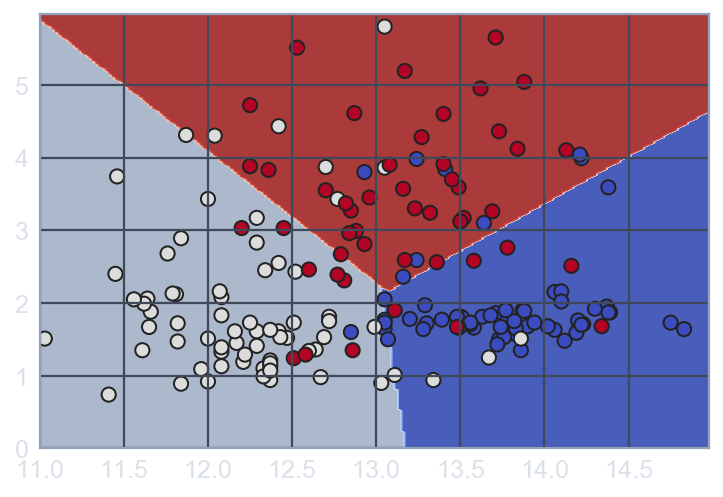

Number of original examples 178
Number of support vectors 81


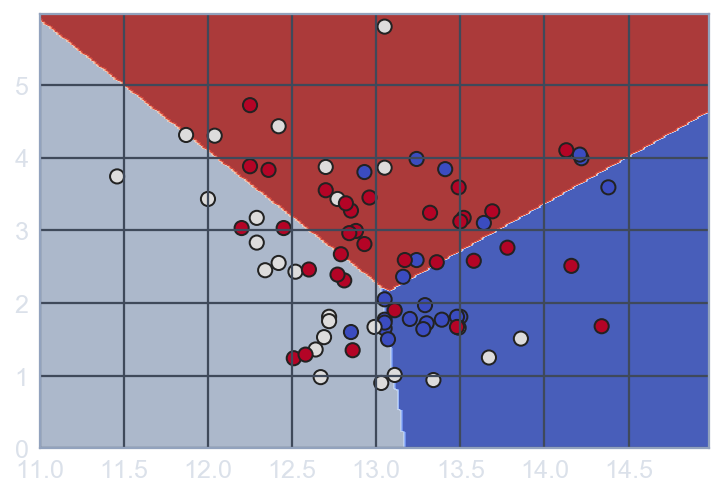

In [51]:
svm = SVC(kernel="linear")
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

## 11. Kernel SVMs

### Transforming your features

<img src='Linear_Classifiers_in_Python/Pictures/Transforming_your_features.png' alt='Transforming your features' width=300 align='left'>

* $ \text{transformed feature = (original feature)}^2 $

<img src='Linear_Classifiers_in_Python/Pictures/Transforming_your_features2.png' alt='Transforming your features' width=600 align='left'>

### Kernel SVMs

* smaller gamma leads to smoother boundaries
* larger gamma leads to more complex boundaries

```python
In [1]: from sklearn.svm import SVC
In [2]: svm = SVC(gamma=1) # default is kernel='rbf'
```

```python
In [1]: from sklearn.svm import SVC
In [2]: svm = SVC(gamma=0.01) # default is kernel='rbf'
```

```python
In [1]: from sklearn.svm import SVC
In [2]: svm = SVC(gamma=2) # default is kernel='rbf'
```

<img src='Linear_Classifiers_in_Python/Pictures/Kernel_SVMs.png' alt='Kernel SVMs' width=400 align='left'>

### №27 GridSearchCV warm-up

* Create a `GridSearchCV` object
* Call the `fit()` method to select the best value of `gamma` based on cross-validation accuracy

```python
svm = SVC()

parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

print("Best CV params", searcher.best_params_)
```

### №28 Jointly tuning gamma and C with GridSearchCV

* Run `GridSearchCV` to find the best hyperparameters using the training set
* Print the best values of the parameters
* Print out the accuracy on the test set, which was not used during the cross-validation procedure

```python
svm = SVC()

parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))
```

## 12 Comparing logistic regression and SVM

### Pros and Cons

Logistic regression:
* Is a linear classifier
* Can use with kernels, but slow
* Outputs meaningful probabilities
* Can be extended to multi-class
* All data points affect fit
* L2 or L1 regularization  

Support vector machine (SVM):
* Is a linear classifier
* Can use with kernels, and fast
* Does not naturally output probabilities
* Can be extended to multi-class
* Only 'support vectors' affect fit
* Conventionally just L2 regularization

### Use in scikit-learn

Logistic regression in sklearn:
* `linear_model.LogisticRegression`  

Key hyperparameters in sklearn:
* `C` (inverse regularizationstrength)
* `penalty` (type of regularization)
* `multi_class` (type of multi-class)  

SVM in sklearn:
* `svm.LinearSVC and svm.SVC`  

Key hyperparameters in sklearn:
* `C` (inverse regularizationstrength)
* `kernel` (type of kernel)
* `gamma` (inverse RBFsmoothness)

### SGDClassifier

* SGDClassifier: scales well to large datasets
* SGDClassifier hyperparameter alpha is like 1/C

```python
In [1]: from sklearn.linear_model import SGDClassifier
In [2]: logreg = SGDClassifier(loss='log')
In [3]: linsvm = SGDClassifier(loss='hinge')
```

### №29 An advantage of SVMs

Which of the following is an advantage of SVMs over logistic regression?

* They naturally outputs meaningful probabilities
* They can be used with kernels
* *They are computationally efficient with kernels*
* They learn sigmoidal decision boundaries

### №30 An advantage of logistic regression

Which of the following is an advantage of logistic regression over SVMs?

* *It naturally outputs meaningful probabilities*
* It can be used with kernels
* It is computationally efficient with kernels
* It learns sigmoidal decision boundaries

### №31 Using SGDClassifier

* Instantiate an `SGDClassifier` instance with `random_state=0`
* Search over the regularization strength, the `hinge` vs. `log` losses, and L1 vs. L2 regularization

```python
linear_classifier = SGDClassifier(random_state=0)

parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'loss':['hinge', 'log'],
              'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))
```